In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./data/train.csv')
df.drop(['index','occyp_type'], axis = 1, inplace = True)
df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,2.0,-26.0,2.0


In [3]:
df.gender = df.gender.replace({'F' : 0, 'M' : 1})
df.car = df.car.replace({'N' : 0, 'Y' : 1})
df.reality = df.reality.replace({'N' : 0, 'Y' : 1})
df.head(3)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,2.0,-22.0,2.0


In [4]:
df['age'] = df.DAYS_BIRTH.apply(lambda x : -x // 365)
df.DAYS_EMPLOYED = (-1) * df.DAYS_EMPLOYED 
df.loc[(df.DAYS_EMPLOYED < 0), 'DAYS_EMPLOYED'] = 0
df.begin_month = (-1) * df.begin_month

In [5]:
y = df.credit
X = df.drop(['credit', 'DAYS_BIRTH'], axis = 1)

In [6]:
X

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,age
0,0,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,4709,1,0,0,0,2.0,6.0,38
1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,1540,1,0,0,1,3.0,5.0,31
2,1,1,1,0,450000.0,Working,Higher education,Married,House / apartment,4434,1,0,1,0,2.0,22.0,52
3,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,2092,1,0,1,0,2.0,37.0,41
4,0,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,2105,1,0,0,0,2.0,26.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,1984,1,0,0,0,4.0,2.0,33
26453,0,0,1,1,180000.0,Working,Higher education,Separated,House / apartment,2475,1,0,0,0,2.0,47.0,41
26454,0,1,0,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,2015,1,0,0,0,2.0,25.0,27
26455,1,0,1,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,107,1,0,0,0,1.0,59.0,27


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
numeric_features = ['child_num', 'income_total', 'DAYS_EMPLOYED', 'family_size', 'begin_month', 'age']
numeric_transformer = StandardScaler()

categorical_features = ['income_type', 'edu_type', 'family_type', 'house_type']
categorical_transformer = OneHotEncoder(categories='auto', handle_unknown = 'ignore')

# label_features = ['credit']
# label_transformer = LabelEncoder()

preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)
                ], remainder='passthrough'
                )

In [9]:
preprocessor.fit(X)
scaled_X = preprocessor.transform(X)

In [10]:
scaled_X

array([[-0.5735993 ,  0.1491363 ,  1.05922745, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.76452932,  0.59084783, -0.27784934, ...,  0.        ,
         0.        ,  1.        ],
       [-0.5735993 ,  2.57854975,  0.94319838, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.5735993 ,  1.03255937, -0.0774355 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.5735993 , -0.16006178, -0.88246627, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5735993 , -1.04348485, -0.50020323, ...,  0.        ,
         0.        ,  0.        ]])

## scaled_X, y 이용

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection, preprocessing

In [13]:
scaled_X = pd.DataFrame(scaled_X)
y = pd.DataFrame(y)

y = utils.to_categorical(y)


In [19]:
model = models.Sequential()

# 1-hidden layer
model.add(layers.Dense(input_dim=scaled_X.shape[1], units=256, activation=None, kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(rate=0.5))

# 2-hidden layer
model.add(layers.Dense(units=256, activation=None, kernel_initializer='he_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(rate=0.5))

# Output layer
model.add(layers.Dense(units=3, activation='softmax'))
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy])

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               8960      
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_7 (Activation)    (None, 256)              

In [20]:
history = model.fit(scaled_X, y, batch_size=100, epochs=300, validation_split=0.3)

Epoch 1/300
186/186 [==============================] - 1s 4ms/step - loss: 1.0734 - categorical_accuracy: 0.5749 - val_loss: 0.9026 - val_categorical_accuracy: 0.6159
Epoch 2/300
186/186 [==============================] - 1s 3ms/step - loss: 0.9294 - categorical_accuracy: 0.6238 - val_loss: 0.8875 - val_categorical_accuracy: 0.6480
Epoch 3/300
186/186 [==============================] - 1s 4ms/step - loss: 0.8882 - categorical_accuracy: 0.6429 - val_loss: 0.8832 - val_categorical_accuracy: 0.6573
Epoch 4/300
186/186 [==============================] - 2s 9ms/step - loss: 0.8727 - categorical_accuracy: 0.6482 - val_loss: 0.8791 - val_categorical_accuracy: 0.6572
Epoch 5/300
186/186 [==============================] - 2s 9ms/step - loss: 0.8696 - categorical_accuracy: 0.6503 - val_loss: 0.8601 - val_categorical_accuracy: 0.6708
Epoch 6/300
186/186 [==============================] - 2s 8ms/step - loss: 0.8656 - categorical_accuracy: 0.6518 - val_loss: 0.8650 - val_categorical_accuracy: 0.669

Epoch 50/300
186/186 [==============================] - 1s 4ms/step - loss: 0.8030 - categorical_accuracy: 0.6808 - val_loss: 0.8128 - val_categorical_accuracy: 0.6833
Epoch 51/300
186/186 [==============================] - 1s 4ms/step - loss: 0.8024 - categorical_accuracy: 0.6843 - val_loss: 0.8105 - val_categorical_accuracy: 0.6867
Epoch 52/300
186/186 [==============================] - 1s 4ms/step - loss: 0.8021 - categorical_accuracy: 0.6841 - val_loss: 0.8121 - val_categorical_accuracy: 0.6852
Epoch 53/300
186/186 [==============================] - 1s 4ms/step - loss: 0.7997 - categorical_accuracy: 0.6838 - val_loss: 0.8101 - val_categorical_accuracy: 0.6869
Epoch 54/300
186/186 [==============================] - 1s 5ms/step - loss: 0.7984 - categorical_accuracy: 0.6842 - val_loss: 0.8125 - val_categorical_accuracy: 0.6876
Epoch 55/300
186/186 [==============================] - 1s 8ms/step - loss: 0.7969 - categorical_accuracy: 0.6840 - val_loss: 0.8109 - val_categorical_accuracy:

Epoch 99/300
186/186 [==============================] - 1s 4ms/step - loss: 0.7717 - categorical_accuracy: 0.6892 - val_loss: 0.8008 - val_categorical_accuracy: 0.6915
Epoch 100/300
186/186 [==============================] - 1s 3ms/step - loss: 0.7701 - categorical_accuracy: 0.6909 - val_loss: 0.8053 - val_categorical_accuracy: 0.6895
Epoch 101/300
186/186 [==============================] - 1s 4ms/step - loss: 0.7665 - categorical_accuracy: 0.6904 - val_loss: 0.8044 - val_categorical_accuracy: 0.6897
Epoch 102/300
186/186 [==============================] - 1s 6ms/step - loss: 0.7684 - categorical_accuracy: 0.6902 - val_loss: 0.8020 - val_categorical_accuracy: 0.6900
Epoch 103/300
186/186 [==============================] - 1s 8ms/step - loss: 0.7636 - categorical_accuracy: 0.6906 - val_loss: 0.8081 - val_categorical_accuracy: 0.6885
Epoch 104/300
186/186 [==============================] - 1s 7ms/step - loss: 0.7679 - categorical_accuracy: 0.6913 - val_loss: 0.8055 - val_categorical_accu

186/186 [==============================] - 2s 8ms/step - loss: 0.7401 - categorical_accuracy: 0.6992 - val_loss: 0.8016 - val_categorical_accuracy: 0.6914
Epoch 196/300
186/186 [==============================] - 2s 10ms/step - loss: 0.7413 - categorical_accuracy: 0.6971 - val_loss: 0.8004 - val_categorical_accuracy: 0.6935
Epoch 197/300
186/186 [==============================] - 1s 6ms/step - loss: 0.7382 - categorical_accuracy: 0.6962 - val_loss: 0.7995 - val_categorical_accuracy: 0.6910
Epoch 198/300
186/186 [==============================] - 1s 4ms/step - loss: 0.7355 - categorical_accuracy: 0.6988 - val_loss: 0.8003 - val_categorical_accuracy: 0.6921
Epoch 199/300
186/186 [==============================] - 1s 4ms/step - loss: 0.7345 - categorical_accuracy: 0.7003 - val_loss: 0.7986 - val_categorical_accuracy: 0.6932
Epoch 200/300
186/186 [==============================] - 1s 4ms/step - loss: 0.7366 - categorical_accuracy: 0.6974 - val_loss: 0.7980 - val_categorical_accuracy: 0.6936

186/186 [==============================] - 2s 10ms/step - loss: 0.7190 - categorical_accuracy: 0.7018 - val_loss: 0.8021 - val_categorical_accuracy: 0.6898
Epoch 292/300
186/186 [==============================] - 1s 5ms/step - loss: 0.7226 - categorical_accuracy: 0.7021 - val_loss: 0.8022 - val_categorical_accuracy: 0.6897
Epoch 293/300
186/186 [==============================] - 2s 9ms/step - loss: 0.7191 - categorical_accuracy: 0.7025 - val_loss: 0.7995 - val_categorical_accuracy: 0.6910
Epoch 294/300
186/186 [==============================] - 1s 6ms/step - loss: 0.7192 - categorical_accuracy: 0.7036 - val_loss: 0.7999 - val_categorical_accuracy: 0.6920
Epoch 295/300
186/186 [==============================] - 1s 6ms/step - loss: 0.7216 - categorical_accuracy: 0.7025 - val_loss: 0.7983 - val_categorical_accuracy: 0.6931
Epoch 296/300
186/186 [==============================] - 1s 6ms/step - loss: 0.7186 - categorical_accuracy: 0.7020 - val_loss: 0.8004 - val_categorical_accuracy: 0.6926

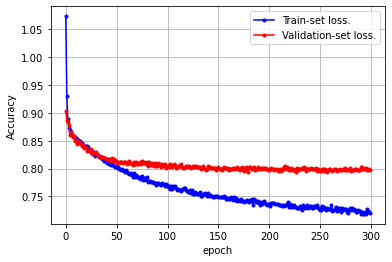

In [21]:
val_loss = history.history['val_loss']
loss = history.history['loss']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(loss)) # x축 좌표를 손으로 만들어준거야 / arange : array of range
plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()